# CISC 856: Reinforcement Learning
## Assignment 1: 2-Player Matrix Games
##### Hugh Morison (10179903)
##### Matthew Filipovich (20029031)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from policy_iteration import p1_rewards, p2_rewards, action_labels, games, normalize, play_game, update_policy, iterate, make_plots, make_trajectory_plots
%matplotlib inline

## Prisoner's Dilemma

Converged to probabilities of lying:
	Player 1:2.5737735004656935e-23
	Player 2:9.66378065171933e-23

Converged to probabilities of confessing:
	Player 1:1.0
	Player 2:1.0



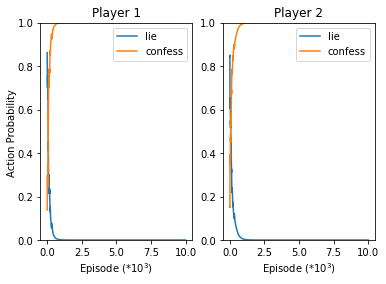

In [3]:
rewards_1 = p1_rewards[0]
rewards_2 = p2_rewards[0]
labels = action_labels[0]
N = 10000

## start with random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

## start with both tending to lie
#policy_1 = np.array([0.8, 0.2])
#policy_2 = np.array([0.8, 0.2])

## start with both tending to confess
#policy_1 = np.array([0.2, 0.8])
#policy_2 = np.array([0.2, 0.8])

## start with one hardened criminal and one rookie
#policy_1 = np.array([0.8, 0.2])
#policy_2 = np.array([0.2, 0.8])

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, max_iterations=N)
p1_lie, p1_confess = zip(*p1_history)
p2_lie, p2_confess = zip(*p2_history)
print('Converged to probabilities of lying:\n\tPlayer 1:{}\n\tPlayer 2:{}\n'.format(p1_lie[-1], p2_lie[-1]))
print('Converged to probabilities of confessing:\n\tPlayer 1:{}\n\tPlayer 2:{}\n'.format(p1_confess[-1], p2_confess[-1]))
make_plots(p1_history, p2_history, labels)

## Matching Pennies

In [ ]:
rewards_1 = p1_rewards[1]
rewards_2 = p2_rewards[1]
labels = action_labels[1]
N = 50000

'First Algorithm'
# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)

make_plots(p1_history, p2_history, labels)

'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N, update_alg='modified')

make_plots(p1_history, p2_history, labels)

## Rock Paper Scissors

In [ ]:
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]
N = 50000

'First Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.01, max_iterations=N)

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)
make_trajectory_plots(p1_history, p2_history, labels)

'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.01, max_iterations=N, update_alg='modified')

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)
make_trajectory_plots(p1_history, p2_history, labels)


# All Three Games

In [ ]:
N = 500000
for game in range(3):
    rewards_1 = p1_rewards[game]
    rewards_2 = p2_rewards[game]
    labels = action_labels[game]
    size = len(labels)
    
    #random starting policies
    print('STANDARD ALGORITHM')
    policy_1 = normalize(np.random.random(size))
    policy_2 = normalize(np.random.random(size))
    p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N)
    make_plots(p1_history, p2_history, labels)
    
    #random starting policies
    print('MODIFIED ALGORITHM')
    policy_1 = normalize(np.random.random(size))
    policy_2 = normalize(np.random.random(size))
    p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N, update_alg='modified')
    make_plots(p1_history, p2_history, labels)